In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exercise

For these exercices we are using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/kernels) provided by Airbnb for a Kaggle competition. It describes its offer for New York City in 2019, including types of appartments, price, location etc.

## 1. Create a dataframe 
Create a dataframe of a few lines with objects and their poperties (e.g fruits, their weight and colour).
Calculate the mean of your Dataframe.

In [3]:
fruits = pd.DataFrame({'fruits':['strawberry', 'orange','melon'], 'weight':[20, 200, 1000], 'color': ['red','orange','yellow']})

In [4]:
fruits

,fruits,weight,color
0,strawberry,20,red
1,orange,200,orange
2,melon,1000,yellow


In [5]:
fruits.mean()

weight    406.666667
dtype: float64

## 2. Import
- Import the table called ```AB_NYC_2019.csv``` as a dataframe. It is located in the Datasets folder. Have a look at the beginning of the table (head).

- Create a histogram of prices

In [6]:
airbnb = pd.read_csv('Datasets/AB_NYC_2019.csv')

In [7]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


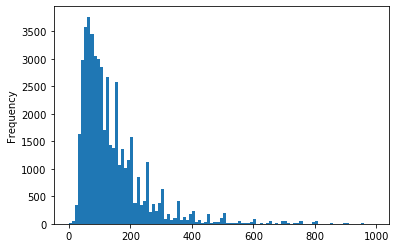

In [8]:
airbnb.price.plot(kind = 'hist', bins = range(0,1000,10))

## 3. Operations

Create a new column in the dataframe by multiplying the "price" and "availability_365" columns to get an estimate of the maximum yearly income.

In [9]:
airbnb['yearly_income'] = airbnb['price']*airbnb['availability_365']

In [10]:
airbnb['yearly_income']

0        54385
1        79875
2        54750
3        17266
4            0
         ...  
48890      630
48891     1440
48892     3105
48893      110
48894     2070
Name: yearly_income, Length: 48895, dtype: int64

## 3b. Subselection and plotting
Create a new Dataframe by first subselecting yearly incomes between 1 and 100'000 and then by suppressing cases with 0 reviews. Then make a scatter plot of yearly income versus number of reviews 

In [11]:
sub_airbnb = airbnb[(airbnb.yearly_income>1)&(airbnb.yearly_income<100000)].copy()
sub_airbnb = sub_airbnb[sub_airbnb.number_of_reviews>10]

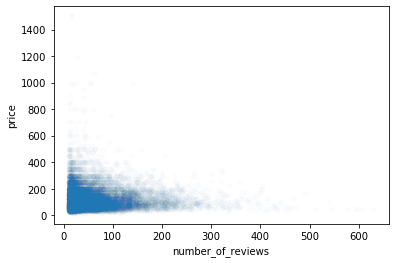

In [12]:
sub_airbnb.plot(x = 'number_of_reviews', y = 'price', kind = 'scatter', alpha = 0.01)
plt.show()

## 4. Combine

We provide below and additional table that contains the number of inhabitants of each of New York's boroughs ("neighbourhood_group" in the table). Use ```merge``` to add this population information to each element in the original dataframe.

In [13]:
boroughs = pd.read_excel('ny_boroughs.xlsx')

In [14]:
boroughs

,borough,population
0,Brooklyn,2648771
1,Manhattan,1664727
2,Queens,2358582
3,Staten Island,479458
4,Bronx,1471160


In [15]:
merged = pd.merge(airbnb, boroughs, left_on = 'neighbourhood_group', right_on='borough')

In [16]:
merged.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,yearly_income,borough,population
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,54385,Brooklyn,2648771
1,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,17266,Brooklyn,2648771
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0,0,Brooklyn,2648771
3,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,2019-06-24,1.34,3,314,27946,Brooklyn,2648771
4,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70837,-73.95352,Entire home/apt,140,2,148,2019-06-29,1.20,1,46,6440,Brooklyn,2648771


## 5. Groups

- Using ```groupby``` calculate the average price for each type of room (room_type) in each neighbourhood_group. What is the average price for an entire home in Brooklyn ?
- Unstack the multi-level Dataframe into a regular Dataframe with ```unstack()``` and create a bar plot with the resulting table


In [17]:
summary = airbnb.groupby(['neighbourhood_group','room_type']).mean().price

In [18]:
summary[('Brooklyn','Entire home/apt')]

178.32754472225128

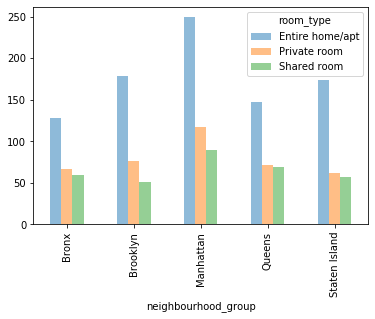

In [19]:
summary.unstack().plot(kind = 'bar', alpha = 0.5)
plt.show()

## 6. Advanced plotting

Using Seaborn, create a scatter plot where x and y positions are longitude and lattitude, the color reflects price and the shape of the marker the borough (neighbourhood_group). Can you recognize parts of new york ? Does the map make sense ?

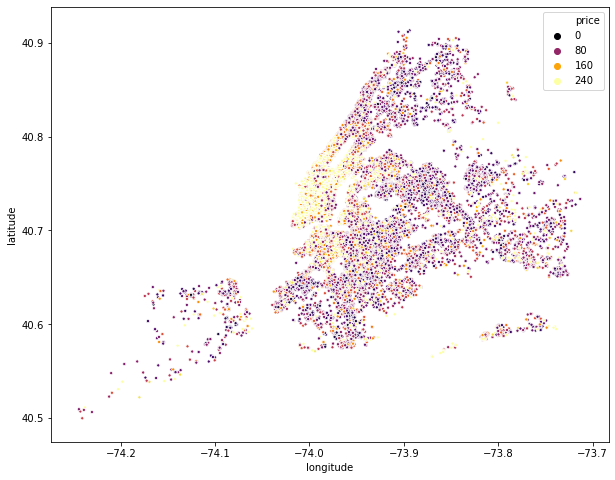

In [32]:
fig, ax = plt.subplots(figsize=(10,8))
g = sns.scatterplot(data = airbnb, y = 'latitude', x = 'longitude', hue = 'price',
                    hue_norm=(0,200), s=10, palette='inferno')